# Mini-Project 1: Regression

## Probability and Linear Regression
To perform linear regression on a collection of pairs {(𝑥(i), y(i))} for 1 ≤ i ≤ n drawn from random variables X and Y is to use a linear model to predict and explain the continuous variable y(i) in terms of the continuous variable 𝑥(i). This produces a “best-fit” line through the data that minimizes the Mean Squared Error (MSE). We understand this line using residuals, MSE, and parameters b0 and b1. The slope of the “best-fit” line is closely related to the correlation between X and Y and when conducting linear regression we assume that there is some underlying relationship between X and Y— if the slope is negative we predict a negative linear relationship, if the slope is positive we predict a positive linear relationship.


#### Part b: Please generate a set of 100 data points where X is distributed {(𝑥(𝑖), 𝑦(𝑖))} according to the Gaussian distribution N(0,1). Find the linear regression line.

Text(4e-05, 4, 'y = 0.515000x + 0.911700')

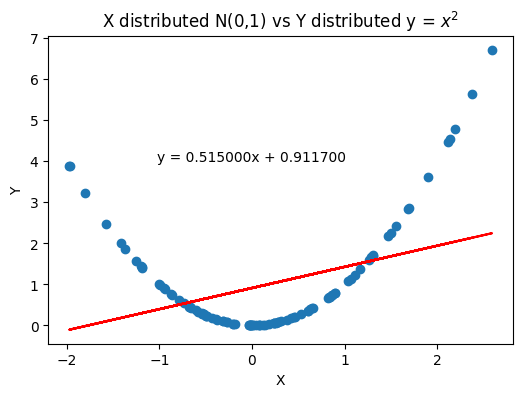

In [1]:
import statistics
import math
import numpy as np
import matplotlib.pyplot as plt

# Question 1.B
# generate 100 data points where X is distributed by the distribution
# N(0,1) and Y = X^2
# rand_num_gen = np.random.default_rng()

x1 = []
y1 = []
mu, sigma = 0, 1
# create 100 data points
for i in range(0, 100):
    sample = np.random.normal(mu, sigma) # x is generated from N(0,1)
    x1.append(sample)
    y1.append(math.pow(sample, 2))

# Prediction function
def predict_savings(salary):
    return polynomial(salary)

# find b0 and b1
coefficients = np.polyfit(x1, y1, 1) 
polynomial = np.poly1d(coefficients)

# store b0, b1
b0 = round(coefficients[0], 4)
b1 = round(coefficients[1], 4)

# formatting regression line
if (b1 > 0): 
    line = 'y = %fx + %f' % (b0, b1)
else: line = 'y = %fx %f' % (b0, b1)

# create the plot
plt.figure(figsize=(6,4))
plt.scatter(x1, y1)
plt.plot(x1, predict_savings(x1), color='red')

# adding labels
plt.xlabel('X')
plt.ylabel('Y')
str = '$x^{2}$'
plt.title('X distributed N(0,1) vs Y distributed y = ' + str)

# display the formula of the line
plt.text(.00004, 4, line, horizontalalignment='center')



#### Part b Cont. :, and another set where X is distributed according to the uniform distribution on [0,1], and 𝑌 = 𝑋^2. 

Text(0.4, 0.7, 'y = 0.998500x -0.154000')

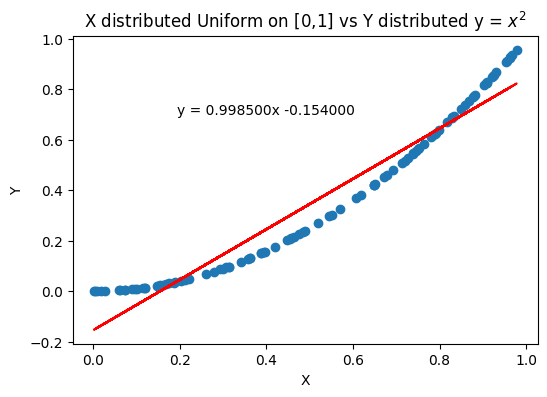

In [2]:
# Question 1.B
# generate 100 data points where X is distributed by the distribution
# N(0,1) and Y = X^2
# rand_num_gen = np.random.default_rng()

x2 = []
y2 = []
mu, sigma = 0, 1
# create 100 data points
for i in range(0, 100):
    sample = np.random.uniform(mu, sigma) # x is generated from U on [0,1]
    x2.append(sample)
    y2.append(math.pow(sample, 2)) # display the formula of the line

# find b0 and b1
coefficients = np.polyfit(x2, y2, 1)
polynomial = np.poly1d(coefficients)

# store b0, b1
b0 = round(coefficients[0], 4)
b1 = round(coefficients[1], 4)

# formatting regression line
if (b1 > 0): 
    line = 'y = %fx + %f' % (b0, b1)
else: line = 'y = %fx %f' % (b0, b1)

# create the plot
plt.figure(figsize=(6,4))
plt.scatter(x2, y2)
plt.plot(x2, predict_savings(x2), color='red')

# adding labels
plt.xlabel('X')
plt.ylabel('Y')
str = '$x^{2}$'
plt.title('X distributed Uniform on [0,1] vs Y distributed y = ' + str)

# display the formula of the line
plt.text(0.4, 0.7, line, horizontalalignment='center')

The uniform distribution on [0,1] is the standard uniform distribution with a minimum of 0 and a maximum of 1. All values are equally likely to occur and have a constant distribution. The normal distribution has a peak at the mean of 0 and the probability of the values further from the mean occurring decreases, resulting in a bell curve. Since the normal distribution allows for values around the mean in both positive and negative standard deviations, we see a parabolic relationship. We expect a slight curve in both because Y = X2, however, since the uniform distribution only ranges from 0 to 1 with an equal probability of occurring, we only see one-half of a flatter curve.

# Anscombe's Quartet
#### Part a: Please load each of the four datasets making Anscombe’s quartet from the “Anscombe_Quartet.xlsx” data file into a Pandas DataFrame with columns labelled by “x” and “y”

In [3]:
# Anscombe's Quartet Question 2A
import pandas as pd
# Load the Anscombe's Dataset into a Pandas DataFrame with columns
# labeled x and y
file_path = 'Anscombe_Quartet.xlsx'

df1 = pd.read_excel(open(file_path, 'rb'), sheet_name='Data1')
# print(df1)

df2 = pd.read_excel(open(file_path, 'rb'), sheet_name='Data2')
# print(df2)

df3 = pd.read_excel(open(file_path, 'rb'), sheet_name='Data3')
# print(df3)

df4 = pd.read_excel(open(file_path, 'rb'), sheet_name='Data4')
# print(df4)

quartet = []
quartet.append(df1)
quartet.append(df2)
quartet.append(df3)
quartet.append(df4)


#### Part B: Verify that each of these datasets has the same mean and variance for each of the variables, and also the same linear regression line.

The means and variances of the columns alone have a large effect on the regression line, as demonstrated by the four different Anscombe datasets having the same means, variances, and lines of linear regression. We additionally know this because of the formula for linearly related random variables, for which the slope b1 = Cov[X, Y] / Var[X] and the y-intercept b0 = y - b1x. Covariance has a direct relationship with correlation, (correlation coefficient = Cov[X, Y] / (StdDev[X]*StdDev[Y])) and as seen in class the correlation is the same for all 4 datasets. Thus we expect the covariance to be the same for all datasets and thus b1 and b0.

In [4]:
# Anscombe's Quartet Question 2B
# Calculating means for x
avg1 = np.sum(pd.DataFrame(df1.iloc[:,0])) / len(df1)
print('check: mean of x for dataset df1: %f' % avg1)
avg2 = np.sum(pd.DataFrame(df2.iloc[:,0])) / len(df2)
avg3 = np.sum(pd.DataFrame(df3.iloc[:,0])) / len(df3)
avg4 = np.sum(pd.DataFrame(df4.iloc[:,0])) / len(df4)

# Check to ensure means are the same
if (math.isclose(avg1, avg2) and math.isclose(avg1, avg3) and 
    math.isclose(avg1, avg4) and math.isclose(avg2, avg3)
    and math.isclose(avg2, avg4) and math.isclose(avg3, avg4)):
    print('means of x for all datasets are equal: true\n')
else: print('means of x for all datasets are equal: false\n')

# Calculating means for y
avg1 = round((np.sum(pd.DataFrame(df1.iloc[:,1])) / len(df1)), 2)
print('check-- mean of y for dataset df1: %f' % avg1)
avg2 = round((np.sum(pd.DataFrame(df2.iloc[:,1])) / len(df2)), 2)
avg3 = round((np.sum(pd.DataFrame(df3.iloc[:,1])) / len(df3)), 2)
avg4 = round((np.sum(pd.DataFrame(df4.iloc[:,1])) / len(df4)), 2)

# Check to ensure means are the same
if (math.isclose(avg1, avg2) and math.isclose(avg1, avg3) and 
    math.isclose(avg1, avg4) and math.isclose(avg2, avg3)
    and math.isclose(avg2, avg4) and math.isclose(avg3, avg4)):
    print('means of y for all datasets are equal: true\n')
else: print('means of y for all datasets are equal: false\n')

###################################
# Calculating variance for x
var1 = round(np.var(pd.DataFrame(df1.iloc[:,0]), ddof = 1), 3)
print('check-- variance of x for dataset df1: %f' % var1)
var2 = round(np.var(pd.DataFrame(df2.iloc[:,0]), ddof = 1), 3)
var3 = round(np.var(pd.DataFrame(df3.iloc[:,0]), ddof = 1), 3)
var4 = round(np.var(pd.DataFrame(df4.iloc[:,0]), ddof = 1), 3)

# Check to ensure vars are the same
if (math.isclose(var1, var2) and math.isclose(var1, var3) and 
    math.isclose(var1, var4) and math.isclose(var2, var3)
    and math.isclose(var2, var4) and math.isclose(var3, var4)):
    print('variance of x for all datasets are equal: true\n')
else: print('variance of x for all datasets are equal: false\n')

# Calculating variance for y
# Note: Sample variances are not exactly the same so we round to the 
# nearest tenth place
var1 = round(np.var(pd.DataFrame(df1.iloc[:,1]), ddof = 1), 3)
print('variance of y for dataset df1: %f' % var1)
var2 = round(np.var(pd.DataFrame(df2.iloc[:,1]), ddof = 1), 3)
print('variance of y for dataset df2: %f' % var2)
var3 = round(np.var(pd.DataFrame(df3.iloc[:,1]), ddof = 1), 3)
print('variance of y for dataset df3: %f' % var3)
var4 = round(np.var(pd.DataFrame(df4.iloc[:,1]), ddof = 1), 3)
print('variance of y for dataset df4: %f\n' % var4)


check: mean of x for dataset df1: 9.000000
means of x for all datasets are equal: true

check-- mean of y for dataset df1: 7.500000
means of y for all datasets are equal: true

check-- variance of x for dataset df1: 11.000000
variance of x for all datasets are equal: true

variance of y for dataset df1: 4.127000
variance of y for dataset df2: 4.128000
variance of y for dataset df3: 4.123000
variance of y for dataset df4: 4.123000



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/var/folders/rj/_c2qxh155cx0zbl6n49s95kr0000gn/T/ipykernel_54359/130061352.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('check: mean of x for dataset df1: %f' % avg1)
/var/folders/rj/_c2qxh155cx0zbl6n49s95kr0000gn/T/ipykernel_54359/130061352.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if (math.isclose(avg1, avg2) and math.isclose(avg1, avg3) and
/var/folders/rj/_c2qxh155cx0zbl6n49s95kr0000gn/T/ipykernel

The means and variances of the columns alone have a large effect on the regression
line, as demonstrated by the four different Anscombe datasets having the same means, variances, and lines of linear regression. We additionally know this because of the formula for linearly related random variables, for which the slope b1 = Cov[X, Y] / Var[X] and the y-intercept b0 = y - b1x. Covariance has a direct relationship with correlation, (correlation coefficient = Cov[X, Y] / (StdDev[X]*StdDev[Y])) and as seen in class the correlation is the same for all 4 datasets. Thus we expect the covariance to be the same for all datasets and thus b1 and b0.

#### Part C: Please use your skills as a data scientist to give what you feel is the best model for explaining the variable y in terms of x for each of these four datasets, being sure to carefully explain your reasoning!



In [112]:
# Anscombe's Quartet Question 2C

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import HuberRegressor, RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import load_diabetes

# function for finding MSE
def mse(df, x, y, coefficient, polynomial):
    sum = 0
    n = len(df)
    for i in range(0, n-1):
        sum += pow(y[i] - polynomial(x[i]), 2)
    return sum/n

# find linear regression line and mse for each
x1 = df1.iloc[:,0].values.tolist()
y1 = df1.iloc[:,1].values.tolist()
coefficients1 = np.polyfit(x1, y1, 1) 
polynomial1 = np.poly1d(coefficients1)

coefficients1Quad = np.polyfit(x1, y1, 2)
polynomial1Quad = np.poly1d(coefficients1Quad)

coefficients1Cube = np.polyfit(x1, y1, 3)
polynomial1Cube = np.poly1d(coefficients1Cube)
print('linear regression line for dataset 1: %s' % polynomial1)
print('MSE : %f' % mse(df1, x1, y1, coefficients1, polynomial1))
print('MSE for quadratic : %f' % mse(df1, x1, y1, coefficients1Quad, polynomial1Quad))
print('MSE for cubic : %f' % mse(df1, x1, y1, coefficients1Cube, polynomial1Cube))

# find linear regression line and mse for each
x2 = df2.iloc[:,0].values.tolist()
y2 = df2.iloc[:,1].values.tolist()
coefficients2 = np.polyfit(x2, y2, 1) 
polynomial2 = np.poly1d(coefficients2)
coefficients2Quad = np.polyfit(x2, y2, 2)
polynomial2Quad = np.poly1d(coefficients2Quad)

print('linear regression line for dataset 2: %s' % polynomial2)
print('MSE for linear: %f' % mse(df2, x2, y2, coefficients2, polynomial2))
print('MSE for quadratic : %f' % mse(df2, x2, y2, coefficients2Quad, polynomial2Quad))

# find linear regression line and mse for each
x3 = df3.iloc[:,0].values.tolist()
y3 = df3.iloc[:,1].values.tolist()
coefficients3 = np.polyfit(x3, y3, 1) 
polynomial3 = np.poly1d(coefficients3)
coefficients3Cube = np.polyfit(x3, y3, 3)
polynomial3Cube = np.poly1d(coefficients3Cube)
print('linear regression line for dataset 3: %s' % polynomial3)
print('MSE for linear: %f' % mse(df3, x3, y3, coefficients3, polynomial3))
print('MSE for cubic : %f' % mse(df3, x3, y3, coefficients3Cube, polynomial3Cube))
print(f" R²: {r2_score(y3, polynomial3(x3)):.4f}")
print(f" R²: {r2_score(y3, polynomial3Cube(x3)):.4f}")
      

# find linear regression line and mse for each
x4 = df4.iloc[:,0].values.tolist()
y4 = df4.iloc[:,1].values.tolist()
coefficients4 = np.polyfit(x4, y4, 1) 
polynomial4 = np.poly1d(coefficients4)
coefficients4Cube = np.polyfit(x4, y4, 3)
polynomial4Cube = np.poly1d(coefficients4Cube)
print('linear regression line for dataset 4: %s' % polynomial4)
print('MSE for cubic : %f' % mse(df4, x4, y4, coefficients4Cube, polynomial4Cube))
print(f" R²: {r2_score(y4, polynomial4Cube(x4)):.4f}")



linear regression line for dataset 1:  
0.5001 x + 3
MSE : 1.248226
MSE for quadratic : 1.160777
MSE for cubic : 1.154120
linear regression line for dataset 2:  
0.5 x + 3.001
MSE for linear: 1.199755
MSE for quadratic : 0.000002
linear regression line for dataset 3:  
0.4997 x + 3.002
MSE for linear: 1.245799
MSE for cubic : 1.167008
 R²: 0.6663
 R²: 0.6884
linear regression line for dataset 4:  
0.4999 x + 3.002
MSE for cubic : 1.248197
 R²: 0.6667


/var/folders/rj/_c2qxh155cx0zbl6n49s95kr0000gn/T/ipykernel_54359/446255994.py:65: RankWarning: Polyfit may be poorly conditioned
  coefficients4Cube = np.polyfit(x4, y4, 3)


##### Visualizing Data

/var/folders/rj/_c2qxh155cx0zbl6n49s95kr0000gn/T/ipykernel_54359/1073055679.py:16: RankWarning: Polyfit may be poorly conditioned
  model4 = np.poly1d(np.polyfit(x4, y4, 3))


Text(0.5, 1.0, 'Dataset 4 Cubic')

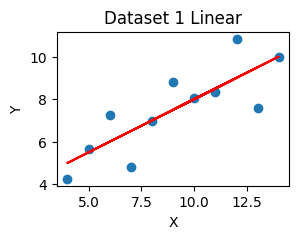

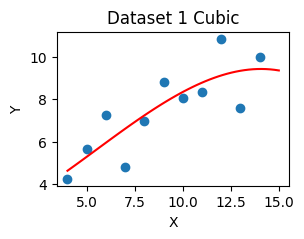

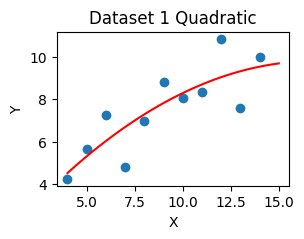

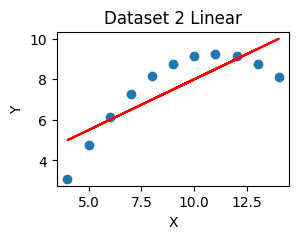

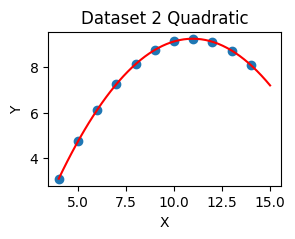

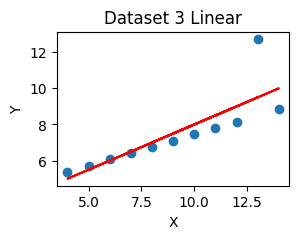

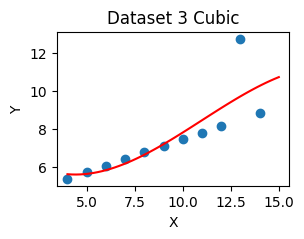

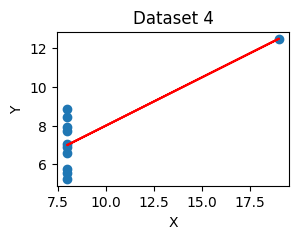

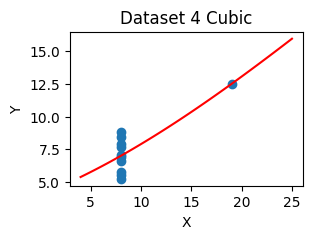

In [111]:
# Anscombe's Quartet Question 2C
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import HuberRegressor, RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import load_diabetes

def predict_y(polynomial, any_x):
    return polynomial(any_x)

model1 = np.poly1d(np.polyfit(x1, y1, 2))
model1c = np.poly1d(np.polyfit(x1, y1, 3))
model2 = np.poly1d(np.polyfit(x2, y2, 2))
model3 = np.poly1d(np.polyfit(x3, y3, 3))
model4 = np.poly1d(np.polyfit(x4, y4, 3))

############################################

# Dataset 1
plt.figure(figsize=(3,2))
plt.scatter(x1, y1)
plt.plot(x1, predict_y(polynomial1, x1), color='red')
# adding labels
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset 1 Linear')

plt.figure(figsize=(3,2))
plt.scatter(x1, y1)
polyline = np.linspace(4, 15, 50)
plt.plot(polyline, model1c(polyline), color='red')
# adding labels
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset 1 Cubic')

plt.figure(figsize=(3,2))
plt.scatter(x1, y1)
polyline = np.linspace(4, 15, 50)
plt.plot(polyline, model1(polyline), color='red')
# adding labels
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset 1 Quadratic')

############################################
# Dataset 2
plt.figure(figsize=(3,2))
plt.scatter(x2, y2)
plt.plot(x2, predict_y(polynomial2, x2), color='red')
# adding labels
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset 2 Linear')

plt.figure(figsize=(3,2))
plt.scatter(x2, y2)
polyline = np.linspace(4, 15, 50)
plt.plot(polyline, model2(polyline), color='red')
# adding labels
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset 2 Quadratic')

############################################

# dataset 3
plt.figure(figsize=(3,2))
plt.scatter(x3, y3)
plt.plot(x3, predict_y(polynomial3, x3), color='red')
# adding labels
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset 3 Linear')

plt.figure(figsize=(3,2))
plt.scatter(x3, y3)
polyline = np.linspace(4, 15, 50)
plt.plot(polyline, model3(polyline), color='red')
# adding labels
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset 3 Cubic')

############################################

# dataset 4
plt.figure(figsize=(3,2))
plt.scatter(x4, y4)
plt.plot(x4, predict_y(polynomial4, x4), color='red')
# adding labels
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset 4')


plt.figure(figsize=(3,2))
plt.scatter(x4, y4)
polyline = np.linspace(4, 25, 50)
plt.plot(polyline, model4(polyline), color='red')
# adding labels
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset 4 Cubic')



### Huber Model Dataset 3

Huber Regression R²: 0.5633, MSE: 1.64


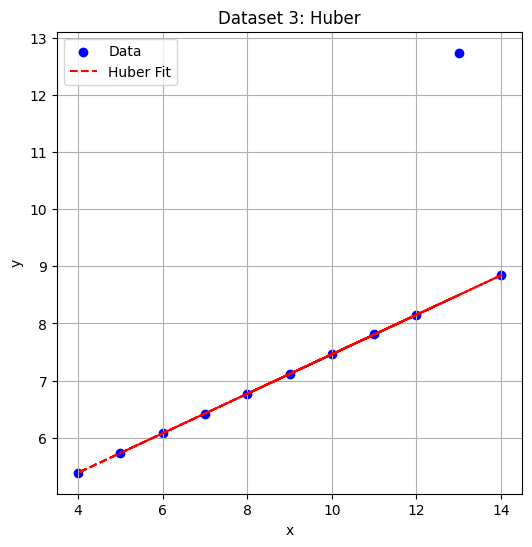

In [57]:

X = df3['x'].values.reshape(-1, 1)
y = df3['y'].values

huber = HuberRegressor()
huber.fit(X, y)
y_pred_huber = huber.predict(X)

# calculate R² and MSE
r2_huber = r2_score(y, y_pred_huber)
mse_huber = mean_squared_error(y, y_pred_huber)
print(f"Huber Regression R²: {r2_huber:.4f}, MSE: {mse_huber:.2f}")

# create plot 
plt.figure(figsize=(6, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred_huber, color='red', label='Huber Fit', linestyle='--')
plt.title('Dataset 3: Huber')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Huber Regression R²: 0.6666, MSE: 1.25
RANSAC Regression R²: 0.6666, MSE: 1.25


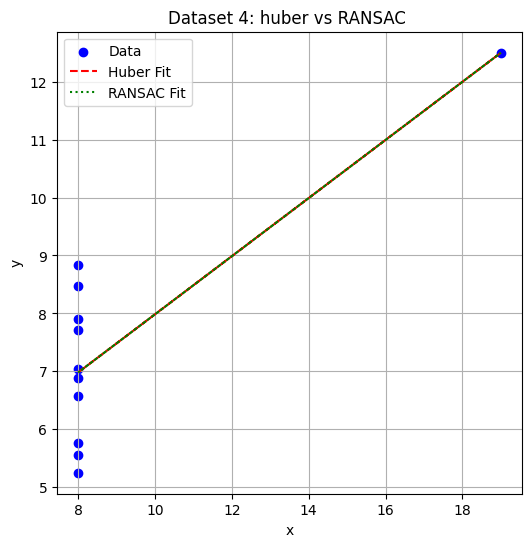

In [113]:
X = df4['x'].values.reshape(-1, 1)
y = df4['y'].values

# ransac
ransac = RANSACRegressor()
ransac.fit(X, y)
y_pred_ransac = ransac.predict(X)

huber = HuberRegressor()
huber.fit(X, y)
y_pred_huber = huber.predict(X)

# find r^2 and MSE 
r2_huber = r2_score(y, y_pred_huber)
mse_huber = mean_squared_error(y, y_pred_huber)

r2_ransac = r2_score(y, y_pred_ransac)
mse_ransac = mean_squared_error(y, y_pred_ransac)
print(f"Huber Regression R²: {r2_huber:.4f}, MSE: {mse_huber:.2f}")
print(f"RANSAC Regression R²: {r2_ransac:.4f}, MSE: {mse_ransac:.2f}")

# plot
plt.figure(figsize=(6, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred_huber, color='red', label='Huber Fit', linestyle='--')
plt.plot(X, y_pred_ransac, color='green', label='RANSAC Fit', linestyle=':')
plt.title('Dataset 4: huber vs RANSAC ')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


          X1        X2         Y
X1  1.000000  0.897257  0.951702
X2  0.897257  1.000000  0.983787
Y   0.951702  0.983787  1.000000
Coefficient for X1: 1.8891
Coefficient for X2: 3.0881
Intercept: 1.0064


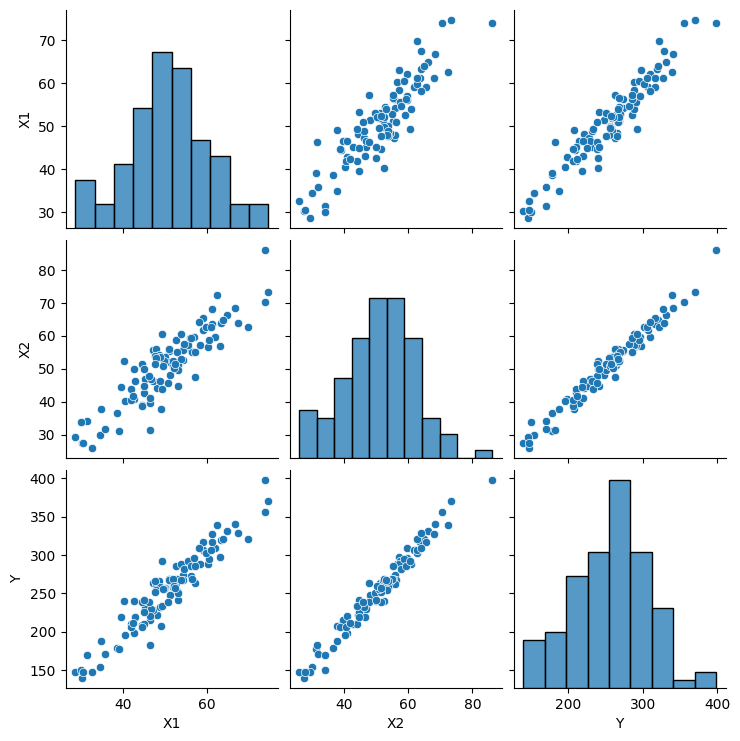

In [127]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(10)

# Create 100 random samples
n = 100

# X1 and X2 will be highly correlated
X1 = np.random.normal(50, 10, n)
X2 = X1 + np.random.normal(0, 5, n)  # X2 is highly correlated with X1

# Y is positively correlated with both X1 and X2
Y = 2 * X1 + 3 * X2 + np.random.normal(0, 5, n)

# Create a DataFrame to hold the data
df = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'Y': Y
})

# Calculate correlations to see that X1 and X2 are positively correlated with Y
print(df.corr())

# Fit multivariable linear regression
linreg = LinearRegression()
X = df[['X1', 'X2']]
linreg.fit(X, df['Y'])

# Print coefficients
print(f"Coefficient for X1: {linreg.coef_[0]:.4f}")
print(f"Coefficient for X2: {linreg.coef_[1]:.4f}")
print(f"Intercept: {linreg.intercept_:.4f}")

# Visualize the data
sns.pairplot(df)
plt.show()

### Correlation Matrix

Correlation matrix:
          X1        X2         Y
X1  1.000000  0.995267  0.971454
X2  0.995267  1.000000  0.951853
Y   0.971454  0.951853  1.000000

Coefficients from multivariable linear regression:
Coefficient for X1: 10.224215246636735
Coefficient for X2: -5.426008968609822
R²: 0.9676


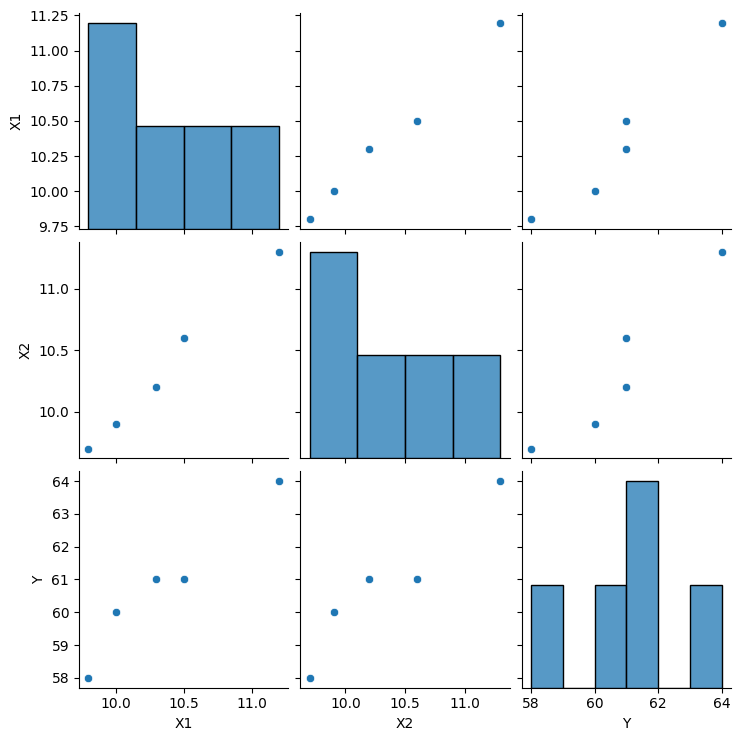

In [134]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt


X1 = [10.0, 10.5, 9.8, 11.2, 10.3]
X2 = [9.9, 10.6, 9.7, 11.3, 10.2] 
Y = [60, 61, 58, 64, 61]


df = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'Y': Y
})

# correlation
print("Correlation matrix:")
print(df.corr())

# multivariable linear regression
X = df[['X1', 'X2']]  # Features
y = df['Y']           # Target
linreg = LinearRegression()
linreg.fit(X, y)

# coeff
print(f"Coefficient for X1: {linreg.coef_[0]}")
print(f"Coefficient for X2: {linreg.coef_[1]}")

# R^2
y_pred = linreg.predict(X)
r2 = r2_score(y, y_pred)
print(f"R²: {r2:.4f}")

sns.pairplot(df)
plt.show()

# Diabetes Dataset
#### Part A: Please load the scikit-learn diabetes dataset (e.g. with the Python sklearn.datasets.load_diabetes() command) into a Pandas DataFrame that includes all features as labeled columns (e.g. series), as well as the (labeled) disease progression measure in the last column

In [27]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes


# load the dataset from sklearn
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

# create a Pandas DataFrame 
df = pd.DataFrame(X, columns=feature_names)
df['disease progression'] = y
print(df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  disease progression  
0   -0.002592  0.0

#### Part B: Please determine what you feel is the best single variable linear model (i.e. using only one feature) to explain disease progression in terms of the data features, being sure to carefully explain your reasoning!
The best single variable linear regression model to explain disease progression is BMI. To analyze, linear regression lines and expected MSE, RMSE, and R2 values for each predictor were calculated. Due to the variable being predicted, “Disease Progression”, having values that range from about 24 to 346, the squared differences between the prediction and actual values were large, causing a very large MSE, with the lowest equaling about 4030. Instead, we found the root mean squared error, for which the lowest was bmi at RMSE = 62.374, second-lowest was s5 at RMSE = 63.49, and the largest was sex at RMSE = 76.934. Additionally, we chose to use the R2 as a tool for analysis, as this will show how well the model explains the variance in data. We desire a value closest to 1, which was bmi at R2 = 0.3439 and s5 at R2 = 0.3202. Thus, since the “bmi” predictor had the lowest RMSE and highest R2 value, this is the best linear regression model to explain disease progression.

Feature: age
  Coefficient: 304.18307452830595, Intercept: 152.13348416289594
  Mean Squared Error: 5720.5470172056475
  Root Mean Squared Error: 75.6342978892886
  R² Score: 0.03530218264671636
Feature: sex
  Coefficient: 69.71535567841458, Intercept: 152.13348416289594
  Mean Squared Error: 5918.888899586022
  Root Mean Squared Error: 76.9343154878629
  R² Score: 0.0018543357106460823
Feature: bmi
  Coefficient: 949.4352603840388, Intercept: 152.13348416289617
  Mean Squared Error: 3890.456585461273
  Root Mean Squared Error: 62.37352471570989
  R² Score: 0.3439237602253802
Feature: bp
  Coefficient: 714.7382594960411, Intercept: 152.13348416289597
  Mean Squared Error: 4774.113902368687
  Root Mean Squared Error: 69.09496293051099
  R² Score: 0.1949061431435003
Feature: s1
  Coefficient: 343.2544518889666, Intercept: 152.13348416289594
  Mean Squared Error: 5663.315623739354
  Root Mean Squared Error: 75.25500397807015
  R² Score: 0.04495353245556555
Feature: s2
  Coefficient: 281.7

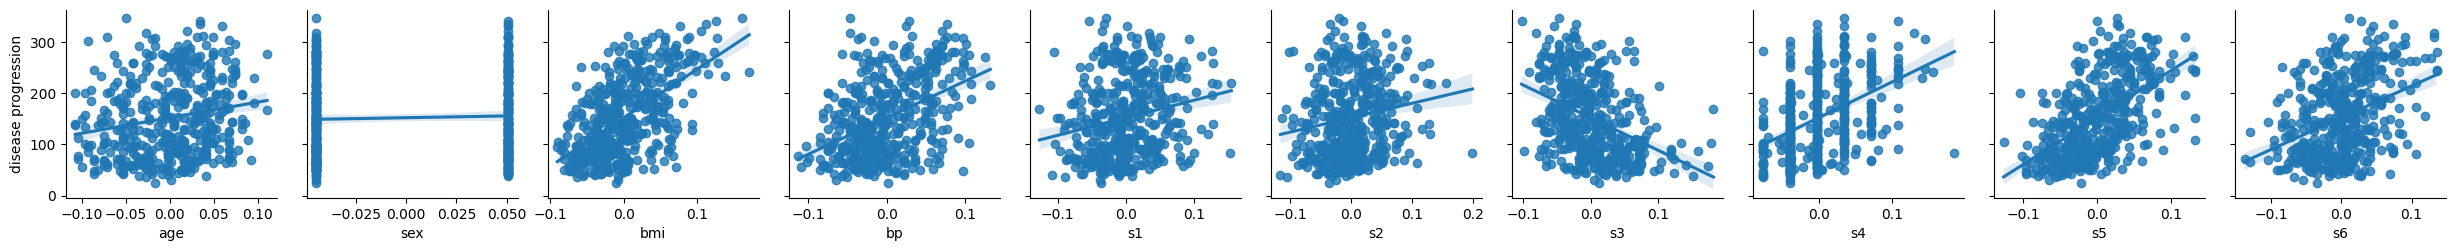

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from math import sqrt

linreg = LinearRegression()

# find coeff and MSE
for feature in feature_names:
    X_feature = df[[feature]]  # Feature as a 2D array
    linreg.fit(X_feature, df['disease progression'])  # Fit model
    y_pred = linreg.predict(X_feature)
    
    # find MSE
    mse = mean_squared_error(df['disease progression'], y_pred)
    rmse = sqrt(mse)  # Root Mean Squared Error
    r2 = r2_score(df['disease progression'], y_pred)
    
    # print the coeff, intercept, and MSE
    print(f"Feature: {feature}")
    print(f"  Coefficient: {linreg.coef_[0]}, Intercept: {linreg.intercept_}")
    print(f"  Mean Squared Error: {mse}")
    print(f"  Root Mean Squared Error: {rmse}")
    print(f"  R² Score: {r2}")

# plot each feature vs Disease Progression
sns.pairplot(df, x_vars=feature_names, y_vars='disease progression', kind='reg', diag_kind=None)
plt.show()


# Multivariate Linear Regression Models With All Features


First, I chose to perform multivariate linear regression analysis only using up to 3 features. There are 10 total predictors. When creating models, the predictions that used four predictors all became accurate to the same extent, having about the same
R2 values of around 0.4. It became difficult to understand the relationship of each predictor to “Disease Progression”. Instead, I performed all possible iterations of two and three predictors for multivariable linear regression, multivariable ridge regression, and multivariable lasso regression. I calculated R2 and RMSE, but since there were so many models, I limited the scope to only include models whose R2 values are greater than 0.39.

The multivariable linear regression combination that had the highest R2 was bmi, bp, and s5 vs Disease Progression with R2 = 0.4801 and RMSE = 55.53.

For ridge regression, I used the alpha value to 0.1, which I found to be the value that balanced issues that could be caused from overfitting. The combination that had the highest R2 was bmi, bp, and s5 vs Disease Progression with R2 = 0.4786 and RMSE = 55.61.

For lasso regression, I used the alpha value to 0.2, which I found to be the value that balanced issues that could be caused from overfitting. The combination that had the highest R2 was bmi, bp, and s5 vs Disease Progression with R2 = 0.4752 and RMSE = 55.79.
Thus, the best multivariable linear model is the multivariable linear regression.

Aside: I also kept in mind high collinearity, and created a correlation matrix that shows the correlation and its strength and direction between each predictor. Features “s1” and “s2” were highly correlated around 0.9, and “s3” and “s4” were highly negatively correlated around -0.74.

In [31]:
from sklearn.linear_model import Ridge, Lasso

X_all_features = df[feature_names]
linreg.fit(X_all_features, df['disease progression'])
y_pred_all = linreg.predict(X_all_features)

# r^2
r2_all = r2_score(df['disease progression'], y_pred_all)
print(f"Multivariate R² Score: {r2_all}")

# Performing regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_all_features, df['disease progression'])
y_pred_ridge = ridge.predict(X_all_features)
r2_ridge = r2_score(df['disease progression'], y_pred_ridge)
print(f"Ridge R² Score: {r2_ridge}")

# lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_all_features, df['disease progression'])
y_pred_lasso = lasso.predict(X_all_features)
r2_lasso = r2_score(df['disease progression'], y_pred_lasso)
print(f"Lasso R² Score: {r2_lasso}")

Multivariate R² Score: 0.5177484222203499
Ridge R² Score: 0.45123062774361733
Lasso R² Score: 0.5088391185938332


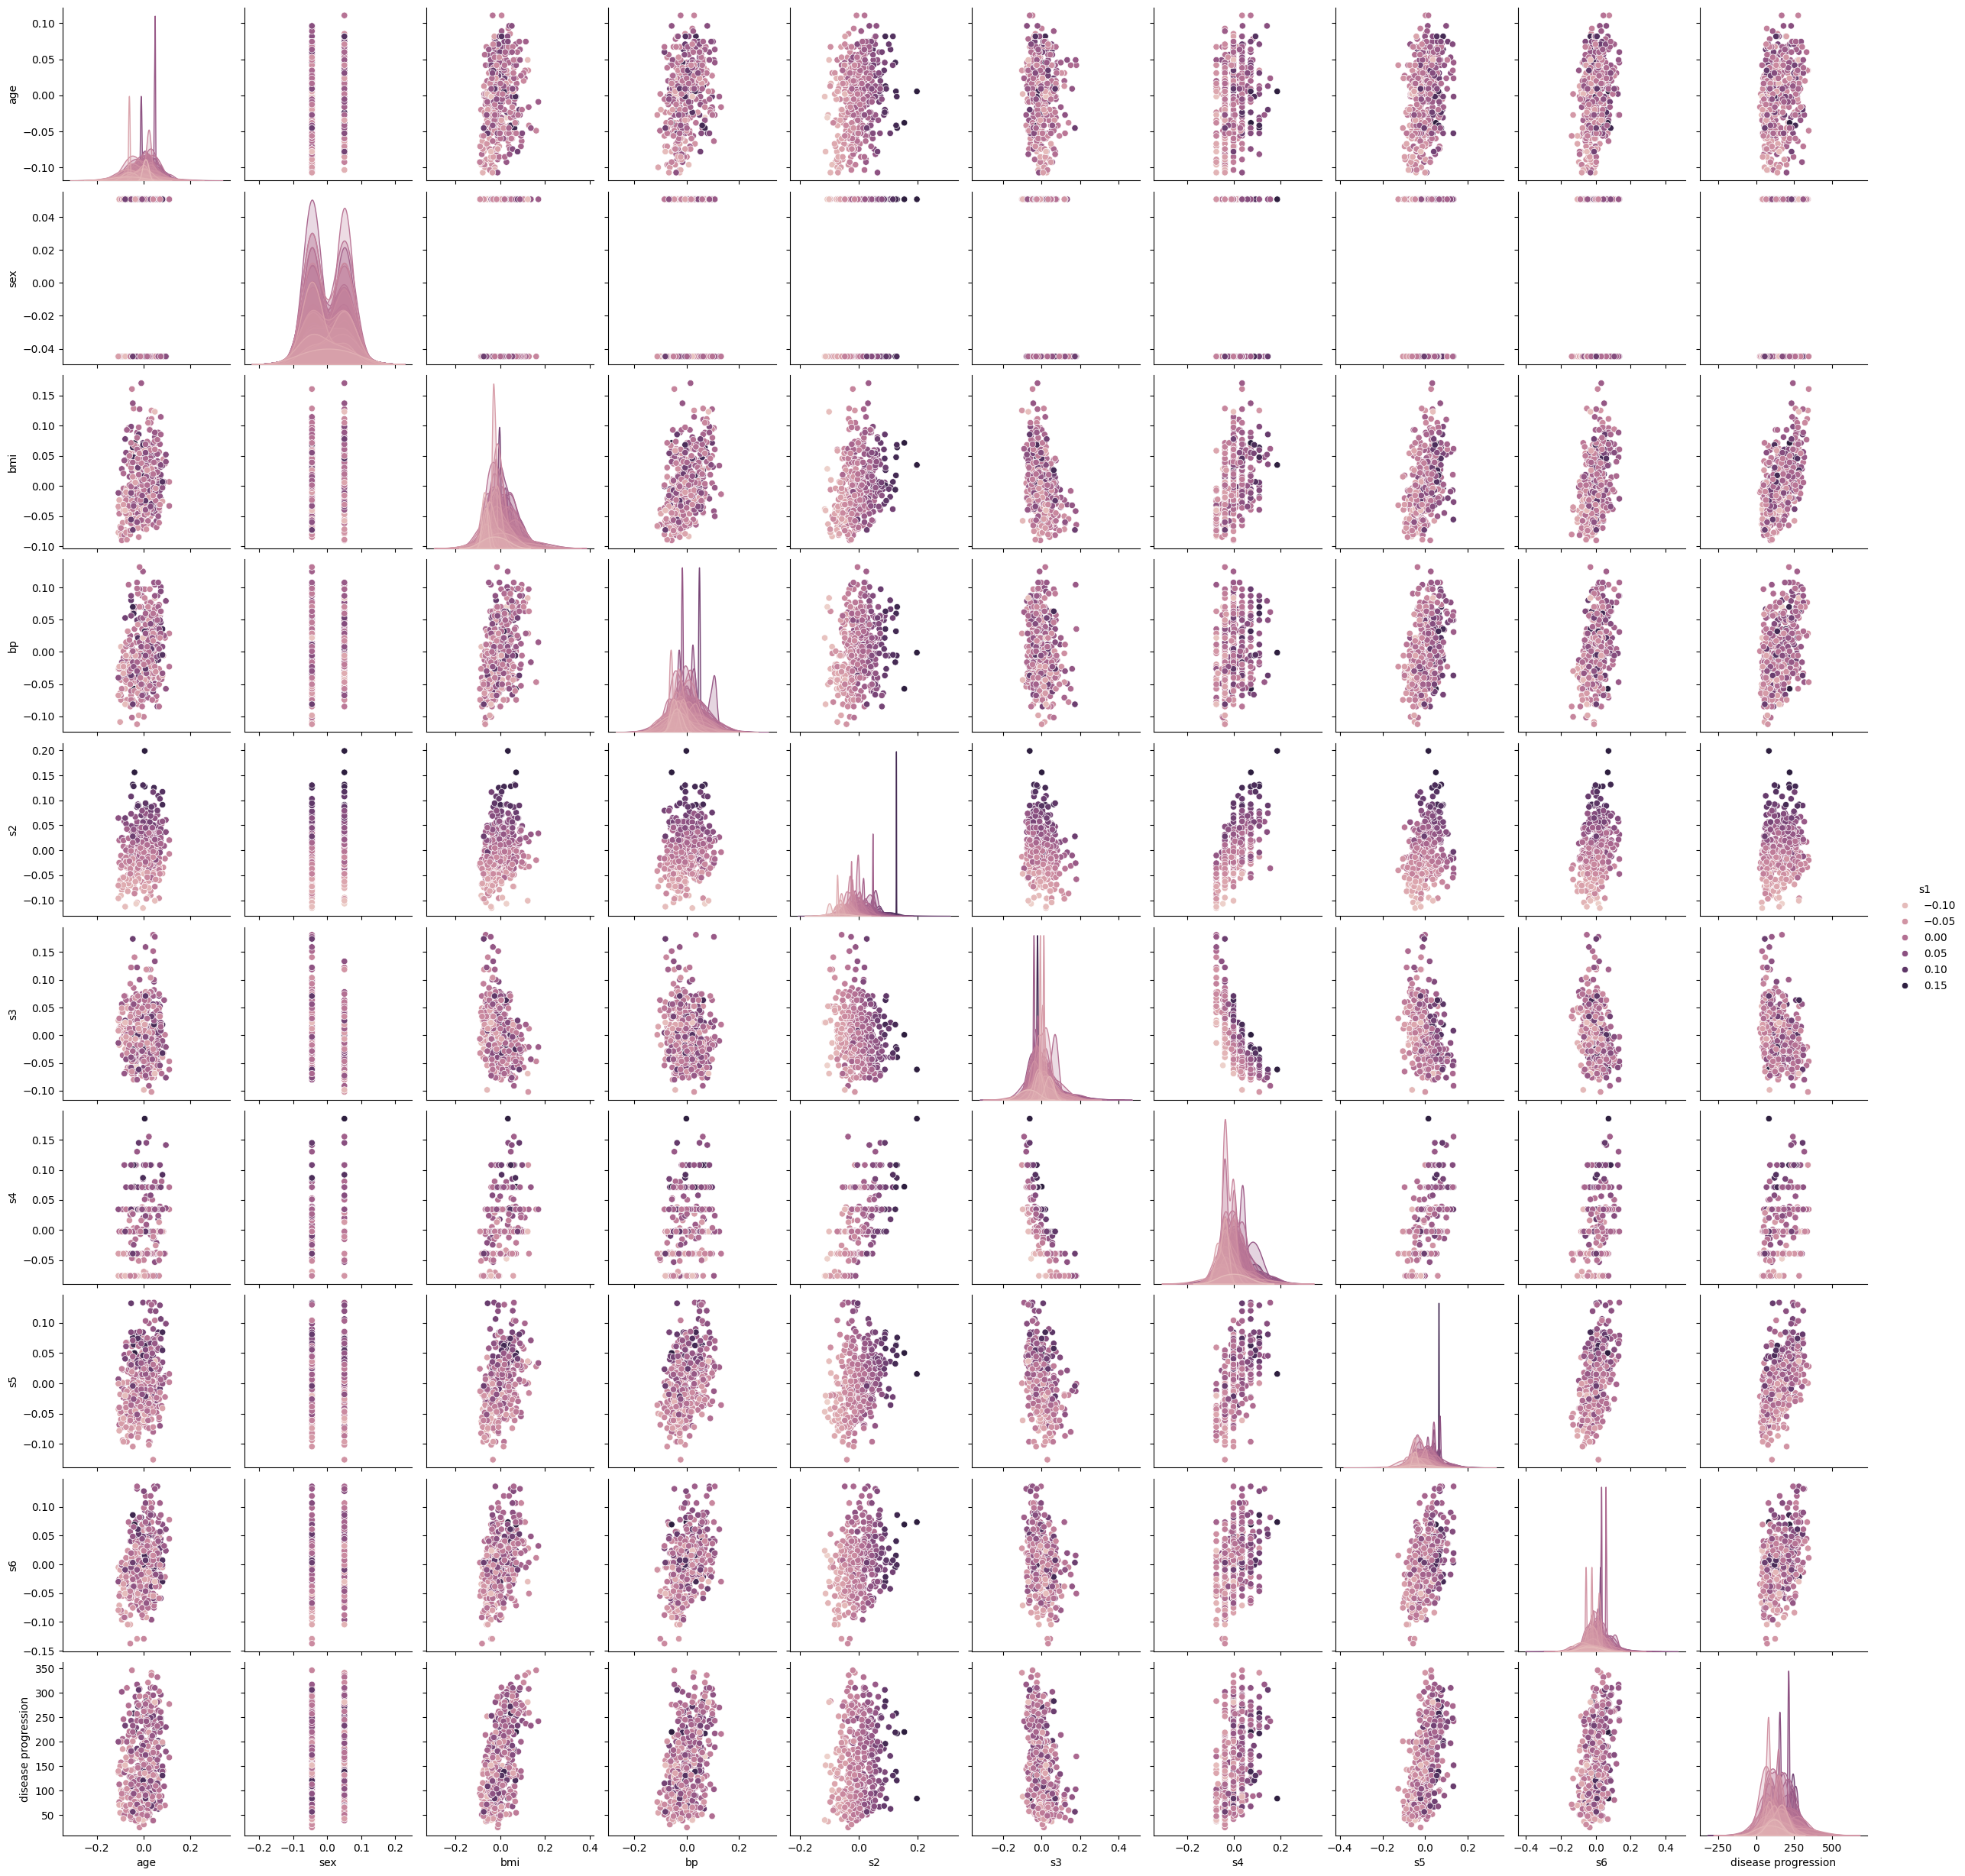

In [15]:
sns.pairplot(df_diabetes, hue='s1')
plt.show()